4-24-19: 01-exploration.ipynb is for initial data loading, exploring, and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from pathlib import Path
import seaborn as sns
import numpy as np
import glob #good for 

import io, time
tm = time.time()

%load_ext autotime

In [2]:
os.getcwd()

'/Users/geickelb1/Documents/GitHub/dl_mri_project/notebooks'

time: 4.22 ms


In [3]:
date="04242019" #defining the date for saving files later

# changing the current drive to the path specified, and assigning wd to this path. 
os.chdir('/Users/geickelb1/Documents/GitHub/dl_mri_project') #use to change working directory


#os.chdir("..") #use to change working directory, changing it to dl_mri_project folder
wd= os.getcwd() #'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling'
# Path(wd+"/data/raw/yes") using the Path() is really useful as it allows the filepath to work on mac and windows

time: 3.26 ms


In [29]:
allyes=glob.glob(wd+"/data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
allno=glob.glob(wd+"/data/raw/no/"+'*.[pjJ][npP][gG]')

time: 4.15 ms


In [31]:
allno

['/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/30 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/22 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/41 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/14 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no 10.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/18 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no 9.png',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no 8.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/3 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/43 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/20 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/32 no.jpg',
 '/Users/geickelb1/Documents/Gi

time: 3.69 ms


# loading in a jpg image

### as array

In [103]:
import cv2
img = cv2.imread(allyes[1])
img.shape

(938, 911, 3)

time: 28.7 ms


In [114]:
img = cv2.imread(allyes[1])
pd.DataFrame(img[:20,:20,1]).describe() #first 20 x 20 voxels (or pixels?) of the mri image summarized by intensity. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.250000,1.100000,1.650000,1.050000,1.250000,1.000000,1.150000,1.500000,13.800000,13.400000,26.500000,51.150000,51.650000,1.000000,1.050000,1.050000,0.900000,1.400000,1.650000,26.400000
std,0.850696,0.967906,2.183069,0.998683,0.850696,0.458831,1.424411,2.064742,56.773419,55.457333,77.480388,102.911446,103.933316,0.794719,0.510418,0.759155,0.447214,1.273206,2.497894,77.841539
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,5.000000,10.000000,5.000000,4.000000,2.000000,7.000000,10.000000,255.000000,249.000000,255.000000,255.000000,255.000000,4.000000,3.000000,4.000000,2.000000,5.000000,12.000000,255.000000


time: 181 ms


In [116]:
(pd.DataFrame(img[:20,:20,1])/255).describe() #now data is between 0 and 1.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.004902,0.004314,0.006471,0.004118,0.004902,0.003922,0.004510,0.005882,0.054118,0.052549,0.103922,0.200588,0.202549,0.003922,0.004118,0.004118,0.003529,0.005490,0.006471,0.103529
std,0.003336,0.003796,0.008561,0.003916,0.003336,0.001799,0.005586,0.008097,0.222641,0.217480,0.303845,0.403574,0.407582,0.003117,0.002002,0.002977,0.001754,0.004993,0.009796,0.305261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
50%,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
75%,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
max,0.015686,0.019608,0.039216,0.019608,0.015686,0.007843,0.027451,0.039216,1.000000,0.976471,1.000000,1.000000,1.000000,0.015686,0.011765,0.015686,0.007843,0.019608,0.047059,1.000000


time: 72.7 ms


## notes:
i believe this will need to be normalized to have mean of 0 and sd of 1. --need to check

### as picture

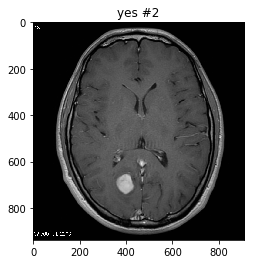

time: 267 ms


In [99]:
#https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88  helpful in this
img = cv2.imread(allyes[1])

plt.imshow(img)
plt.title('yes #2')
plt.show()

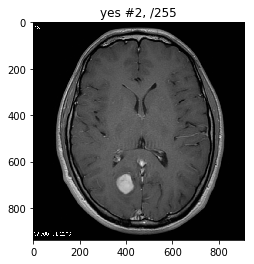

time: 561 ms


In [119]:
plt.imshow(img/255)
plt.title('yes #2, matrix/255')
plt.show()
#image looks the same

### confirming workflow works with the 2 png files

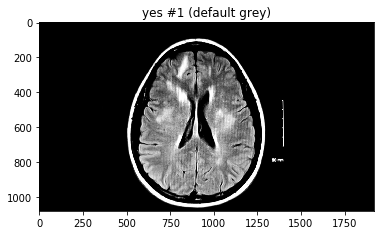

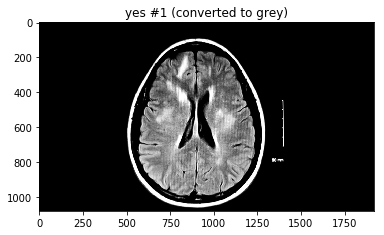

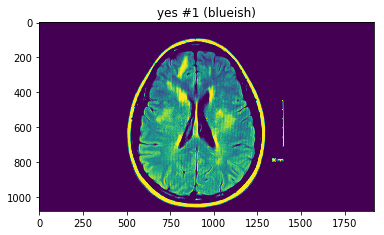

time: 870 ms


In [98]:
#pngY=glob.glob(wd+"/data/raw/yes/"+'*.[pP][nN][gG]')
pngN=glob.glob(wd+"/data/raw/no/"+'*.[pP][nN][gG]')

cv2.imread(pngN[0],0)

img = cv2.imread(pngN[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #this converted it to a blueish image, i didn't like it.
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)#this converted it to a greyscale image, seems unnecessary, cant tell difference.

plt.imshow(img)
plt.title('yes #1 (default grey)')
plt.show()

plt.imshow(RGB_im)
plt.title('yes #1 (converted to grey)')
plt.show()

plt.imshow(gray)
plt.title('yes #1 (blueish)')
plt.show()

### looking at first 10 yes images

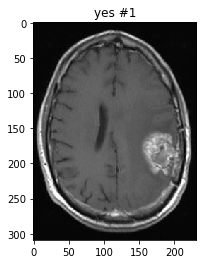

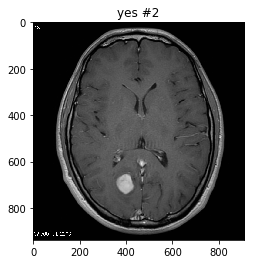

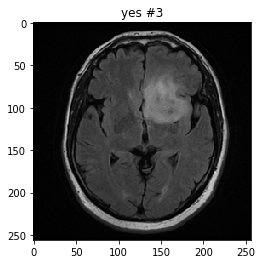

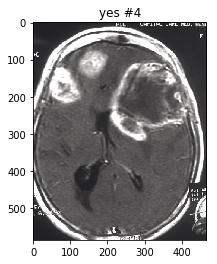

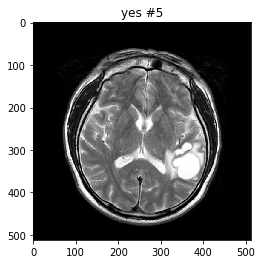

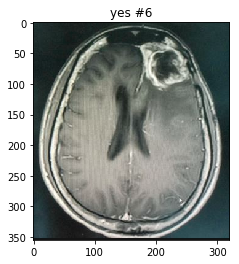

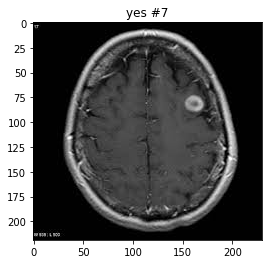

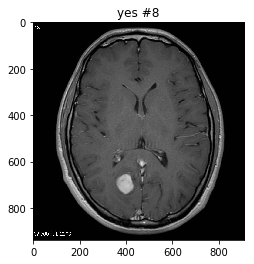

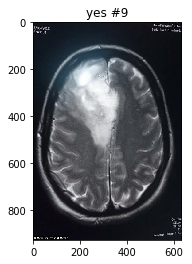

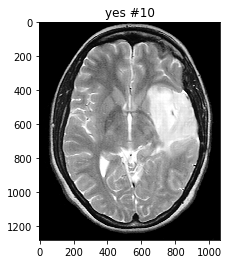

time: 1.72 s


In [95]:
for element in range(0,10):
    img = cv2.imread(allyes[element])
    #RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('yes #{}'.format(element+1))
    plt.show()

### looking at first 10 no images

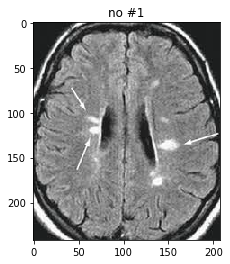

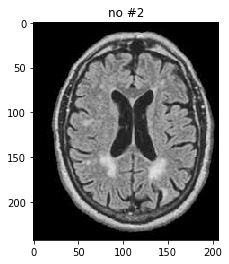

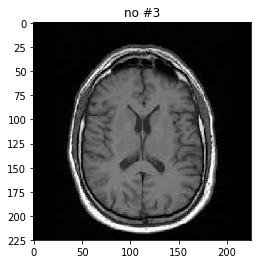

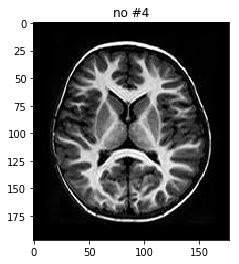

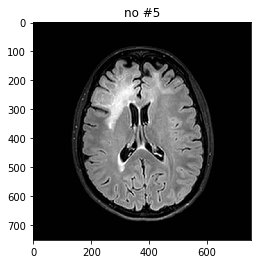

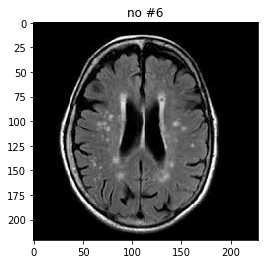

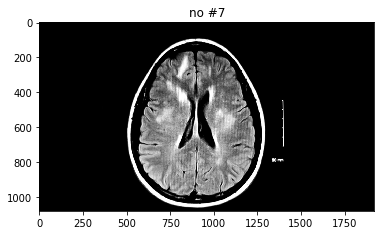

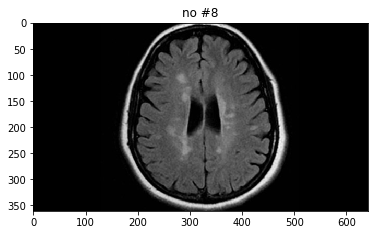

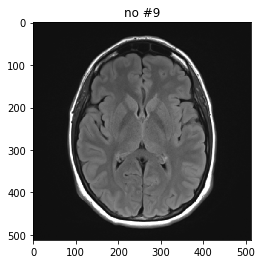

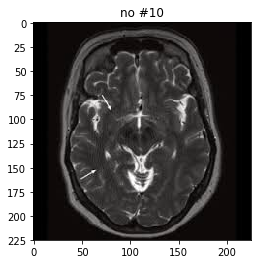

time: 1.7 s


In [94]:
#first 10 no images
for element in range(0,10):
    img = cv2.imread(allno[element])
    #RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title('no #{}'.format(element+1))
    plt.show()

## notes

* the images do need some preprocessing as there is heterogenity in: 
 * color intensity/contrast
 * baseline color of grey matter
 * image size/cropping
 * maybe image scaling? 
 * depth of the MRI slice is not consistant (ie how far down the skull the image is taken- this can't be fixed by preprocessing. 

*<del> apparently there are 2 .pgn files too: no 9, and Y92
 

### exploring shape of first 10 yes images

In [78]:
dim_list=[]
for i in range(0,9):
    dim_list.append(cv2.imread(allyes[i]).shape)
dim_list


[(309, 232, 3),
 (938, 911, 3),
 (256, 256, 3),
 (586, 467, 3),
 (512, 512, 3),
 (355, 320, 3),
 (219, 230, 3),
 (938, 911, 3),
 (929, 634, 3)]

time: 57.8 ms


## problem: all different image sizes. can we get away with standardizing image size?

In [151]:
dim_list=[]
for i in range(0,9):
    dim_list.append(cv2.imread(allyes[i]).reshape(784))
dim_list

ValueError: cannot reshape array of size 215064 into shape (784,)

time: 9.08 ms


https://medium.com/coinmonks/visualizing-brain-imaging-data-fmri-with-python-e1d0358d9dba  - this link suggests that the 3'd dimension is the slice #, so we need to explore if there are different slices

In [79]:
test_img = cv2.imread(allyes[1])
print(test_img.shape)
#The output above suggests us that the brain was scanned in 54 slices with a resolution of 256 x 256 voxels per slice. In order to visualize each slice we need to rearrange the data.

(938, 911, 3)
time: 10.6 ms


The output above tells us that the brain was scanned in 3 slices with a resolution of 938 x 911 voxels per slice. In order to visualize each slice we need to rearrange the data.


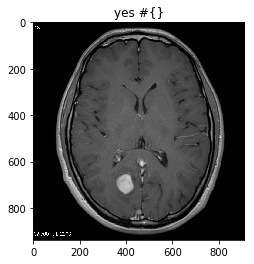

time: 352 ms


In [100]:
test_img = cv2.imread(allyes[1])


In [70]:
test_RGB_im.shape

(938, 911, 3)

time: 2.73 ms


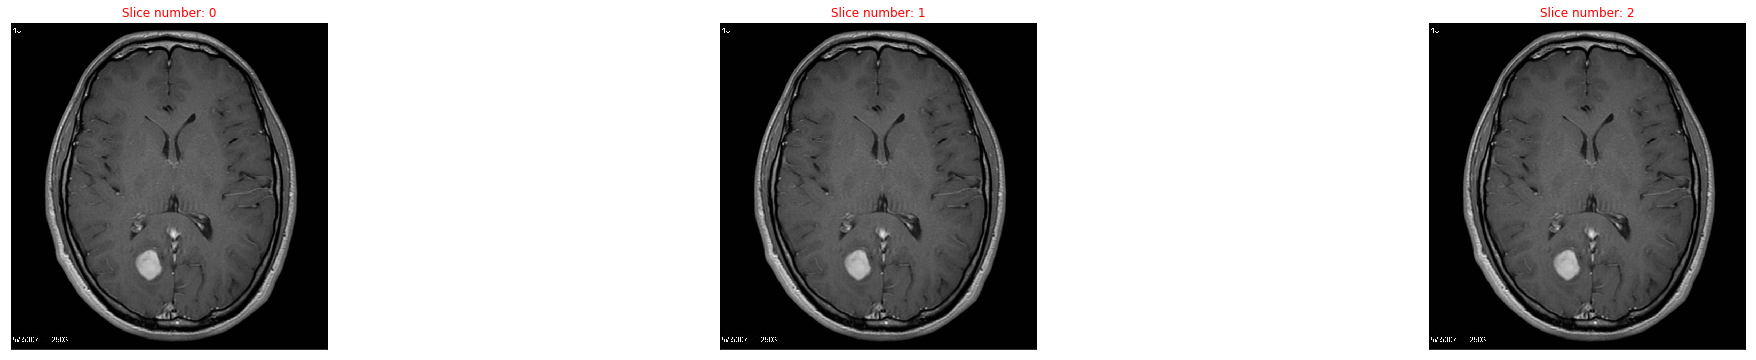

time: 460 ms


In [101]:
fig, ax = plt.subplots(1, 3, figsize=[36, 6])

n = 0
slice = 0
for i in range(0,3):
#     test_RGB_im = cv2.cvtColor(test_img[:,:,i], cv2.COLOR_BGR2RGB)
#     print(test_RGB_im.shape)
#     print(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)[:,:,i].shape)
#     ax[n].imshow(cv2.cvtColor(test_img[:,:,i], cv2.COLOR_BGR2RGB), 'gray')
#     ax[n].imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)[:,:,i], 'gray')
    ax[n].imshow(test_img[:,:,i], 'gray')
    ax[n].set_xticks([])
    ax[n].set_yticks([])
    ax[n].set_title('Slice number: {}'.format(slice), color='r')
    n += 1
    slice += 1

(911, 938, 3)


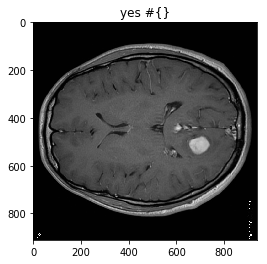

time: 254 ms


In [48]:
#rotating the image

import numpy as np
data = np.rot90(test_img.squeeze(), 1)
print(data.shape)
#(256, 256, 54)

test_RGB_im = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)

plt.imshow(test_RGB_im)
plt.title('yes #{}')
plt.show()


# todo:

going to read through https://medium.com/tensorflow/an-introduction-to-biomedical-image-analysis-with-tensorflow-and-dltk-2c25304e7c13 and see if any useful information.

# notes
* https://github.com/jcreinhold/intensity-normalization
Intensity normalization is an important pre-processing step in many image processing applications regarding MR images since MR images do not have a consistent intensity scale. this is definitely a problem we see here. 

* https://arxiv.org/abs/1812.04652: Image synthesis learns a transformation from the intensity features of an input image to yield a different tissue contrast of the output image. This process has been shown to have application in many medical image analysis tasks including imputation, registration, and segmentation. To carry out synthesis, the intensities of the input images are typically scaled--i.e., normalized--both in training to learn the transformation and in testing when applying the transformation, but it is not presently known what type of input scaling is optimal. In this paper, we consider seven different intensity normalization algorithms and three different synthesis methods to evaluate the impact of normalization. Our experiments demonstrate that intensity normalization as a preprocessing step improves the synthesis results across all investigated synthesis algorithms. Furthermore, we show evidence that suggests intensity normalization is vital for successful deep learning-based MR image synthesis.

* https://medium.com/tensorflow/an-introduction-to-biomedical-image-analysis-with-tensorflow-and-dltk-2c25304e7c13: it's possible that Due to the different nature of acquisition, some images will require special pre-processing (e.g. intensity normalization, bias-field correction, de-noising, spatial normalization/registration, etc).

try a couple of pretrained networks. the idea is that they are already trained to extract low level features of images and we can 
therefore finetune for our classification task.

examples: resnet, vgg, alexnet


also try to look at previous kaggle competitions for MRI classification.

look into u-Net (suggested by prof). it's an immage to image translation. need labeld data (need segments labeld). 

need to look at saliency map once we train an initial model.

# combining all yes and no into arrays

In [ ]:
for element in range(0,10):
    img = cv2.imread(allyes[element])

In [132]:
allyes_img = [cv2.imread(file) for file in allyes]
allno_img = [cv2.imread(file) for file in allno]

time: 370 ms


In [147]:
np.array(allyes_img).shape

(155,)

time: 2.52 ms


In [130]:
from os.path import isfile, join
allyes_img = np.empty(len(allyes), dtype=object)
# for n in range(0, len(allyes)):
#       allyes_img[n] = cv2.imread([cv2.imread(file) for file in allyes])

TypeError: bad argument type for built-in operation

time: 405 ms
